Evaluation of the trained models:

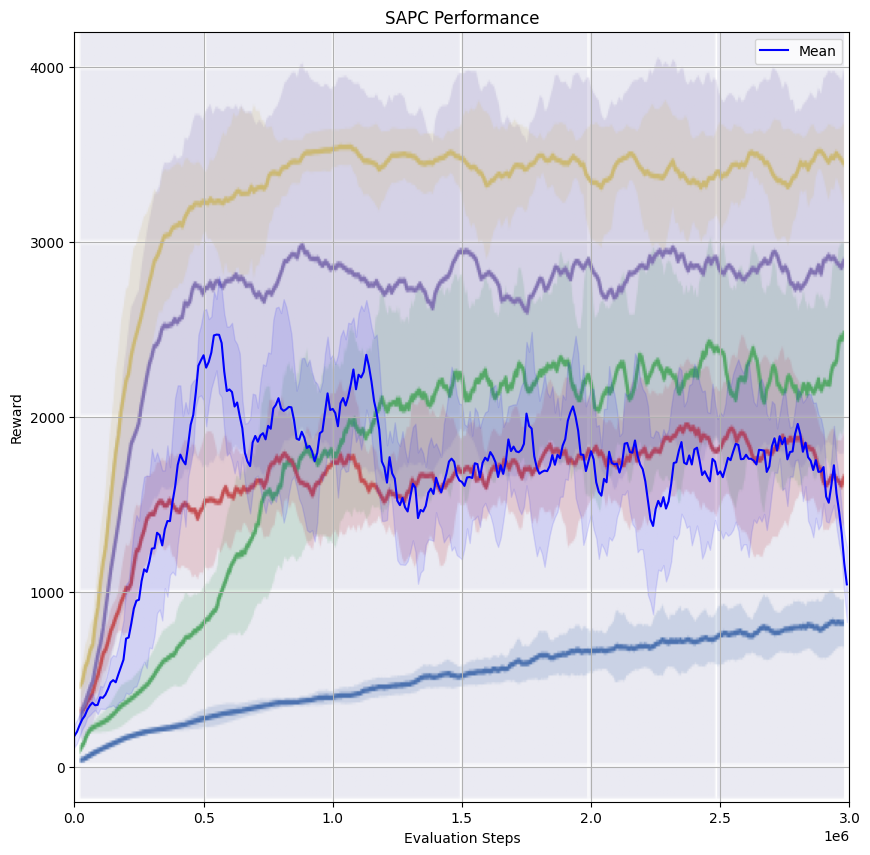

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.transforms as mtransforms

# Get the rewards from the files in agent_SAPC_seed:
rewards = {}
for seed in range(5):
    reward = np.load(f'agent_SAPC_{seed}/rewards.npy')
    rewards[seed] = reward

# Calculate the moving average over 11 epochs:
moving_average = {seed: np.convolve(rewards[seed], np.ones(11)/11, mode='same') for seed in range(5)}

# Compute mean and standard deviation
mean = np.mean(list(moving_average.values()), axis=0)
std = np.std(list(moving_average.values()), axis=0)

# Compute evaluation steps
evaluation_steps = np.arange(0, 3e6, 10000)[:len(mean)]  # Adjust for moving average window

# Load SVG as a background (workaround using imshow requires raster format)
fig, ax = plt.subplots(figsize=(10, 10))

# Workaround: Use an inset_axes to display the SVG using plt.imread (if converted to PNG)
try:
    img = mpimg.imread("figures/PerformanceHopperv3SpinningUp.png")  # Convert SVG to PNG manually
    ax.imshow(img, aspect='auto', extent=[-500000, 3.05e6, -1000, 4900], alpha=1)  # Adjust transparency
except Exception as e:
    print(f"Could not load background image: {e}")

# Plot mean and std deviation
ax.plot(evaluation_steps, mean, label='Mean', color='b')
ax.fill_between(evaluation_steps, mean-std, mean+std, alpha=0.1, color='b')

# Formatting
ax.set_xlabel('Evaluation Steps')
ax.set_ylabel('Reward')
ax.set_title('SAPC Performance')
ax.grid()
ax.set_ylim((-200, 4200))
ax.set_yticks(np.arange(0, 5000, 1000))
ax.set_xlim((0, 3e6))
ax.legend()

# Save the figure
plt.savefig('figures/SAPC_Performance.png')